## Log Transformations

## Introduction

In this lesson, you will take a look at logarithmic transformations and when to apply them to features of a dataset. This will then become an effective technique you can use to improve the performance of linear regression models.

## Objectives

You will be able to:

* Determine if a log transformation would be useful for a specific model or set of data
* Apply log transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a log transformation

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

plt.style.use('seaborn-talk')
%matplotlib inline

## Non-Linear Transformations

Log transformations are one of several different techniques that fundamentally reshape the modeled relationship between the variables. Unlike linear transformations, we won't be able to "go back" to the initial or original linear coefficients, because what we are modeling is not the same relationship.

The reason to apply this kind of transformation is that **you believe that the underlying relationship is not linear**. Then by applying these techniques, you may be able to model a linear relationship between the transformed variables, even though there wasn't a linear relationship between the raw, un-transformed variables.

## Logarithmic Functions

While we typically use the shorthand of "log", the full name of the function we are applying is the ***logarithm***. Logarithmic functions are the inverse of exponential functions. The particular logarithm we typically use is the natural logarithm, which is the opposite of an exponential function of the mathematical constant $e$ (also known as Euler's number).

In [2]:
math.e

2.718281828459045

The natural exponential function $e^x$ means taking each value of a variable and returning $e$ to the power of $x$. It looks something like this:

In [3]:
# original x
x = np.arange(0, 10, 0.5)
# natural exponential function applied to x
e_x = np.exp(x)

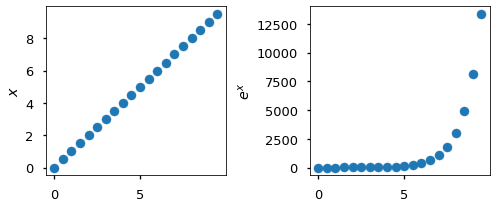

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))

ax1.scatter(x, x)
ax1.set_ylabel("$x$")
ax2.scatter(x, e_x)
ax2.set_ylabel("$e^x$")

fig.tight_layout();

Then the natural logarithm is the **inverse** of $e^x$:

In [5]:
# natural log of natural exponent of x
ln_e_x = np.log(e_x)

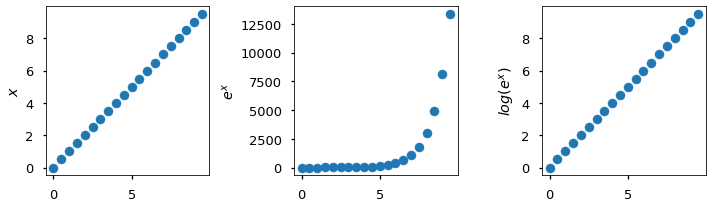

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,3))

ax1.scatter(x, x)
ax1.set_ylabel("$x$")
ax2.scatter(x, e_x)
ax2.set_ylabel("$e^x$")
ax3.scatter(x, ln_e_x)
ax3.set_ylabel("$log(e^x)$")

fig.tight_layout();

The reason you would apply a log transformation is that you are trying to go from the middle graph (exponential relationship) to the graph on the right (linear relationship).

However if you apply a log transformation when the original relationship wasn't exponential, then you will get something like this:

In [7]:
# natural log of x (adding 1 because log(0) is undefined)
ln_x = np.log(x + 1)

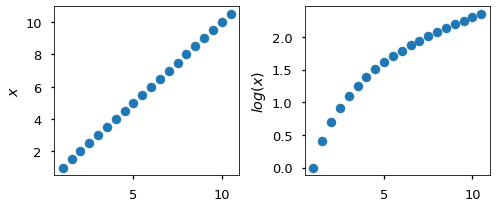

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

ax1.scatter(x + 1, x + 1)
ax1.set_ylabel("$x$")
ax2.scatter(x + 1, ln_x)
ax2.set_ylabel("$log(x)$")

fig.tight_layout();

If you see something like the plot on the right after you perform the log transformation, then a log transformation was probably not the appropriate approach.

## Baseline Auto MPG Model

Let's look at a baseline model that uses the Auto MPG dataset:

In [9]:
data = pd.read_csv("auto-mpg.csv")
y_raw = data["mpg"]
X_raw = data[["weight", "model year"]]
X_raw

,weight,model year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70
...,...,...
387,2790,82
388,2130,82
389,2295,82
390,2625,82


In [10]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Thu, 19 May 2022   Prob (F-statistic):          3.33e-140
Time:                        17:46:27   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.0

### Baseline Model Evaluation and Interpretation

The baseline model is statistically significant overall, and explains about 81% of the variance in MPG.

The coefficients for the intercept, `weight`, and `model year` are statistically significant.

* For a car with 0 cylinders, weighing 0 lbs, and built in 1900, we would expect an MPG of about -14
* For each increase of 1 lb in weight, we see an associated decrease of about 0.007 MPG
* For each increase of 1 year in model year, we see an associated increase of about 0.76 in MPG

Let's say we have some reason to believe that the relationship between weight and MPG is not linear. Can we address it using a log transformation?

## Log Transforming a Feature

Let's try building a model that uses the log of `weight` rather than the raw values.

In [11]:
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log[["weight", "log(weight)"]]

,weight,log(weight)
0,3504,8.161660
1,3693,8.214194
2,3436,8.142063
3,3433,8.141190
4,3449,8.145840
...,...,...
387,2790,7.933797
388,2130,7.663877
389,2295,7.738488
390,2625,7.872836


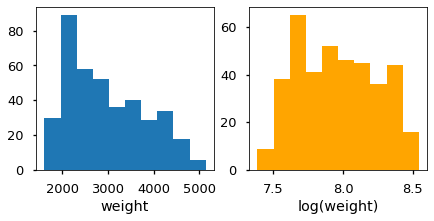

In [12]:
# Plot distributions of raw vs. transformed values
# (scales are so different that it's not reasonable to share an x-axis)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_weight_log["weight"])
ax1.set_xlabel("weight")
ax2.hist(X_weight_log["log(weight)"], color="orange")
ax2.set_xlabel("log(weight)");

Note that the distribution of the predictor is changed by applying the log transformation. Unlike a linear transformation that just "moves" or "stretches" the transformed variable, this transformed variable has a different skew as well.

In [13]:
# Dropping original weight column
X_weight_log.drop("weight", axis=1, inplace=True)

# Reordering columns for easier comparison
X_weight_log = X_weight_log[["log(weight)", "model year"]]

X_weight_log

,log(weight),model year
0,8.161660,70
1,8.214194,70
2,8.142063,70
3,8.141190,70
4,8.145840,70
...,...,...
387,7.933797,82
388,7.663877,82
389,7.738488,82
390,7.872836,82


## Model with a Log Transformed Feature

Now let's build a model where `cylinders` and `model year` are still in their original units, while `weight` has been log transformed.

In [14]:
weight_log_model = sm.OLS(y_raw, sm.add_constant(X_weight_log))
weight_log_results = weight_log_model.fit()

print(f"""
Baseline model adjusted R-Squared:    {baseline_results.rsquared_adj}
log(weight) model adjusted R-Squared: {weight_log_results.rsquared_adj}
""")


Baseline model adjusted R-Squared:    0.8071940863723529
log(weight) model adjusted R-Squared: 0.8364670750279433



In [15]:
print(weight_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 19 May 2022   Prob (F-statistic):          4.10e-154
Time:                        17:46:28   Log-Likelihood:                -1005.3
No. Observations:                 392   AIC:                             2017.
Df Residuals:                     389   BIC:                             2028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         127.2362      6.587     19.316      

In [16]:
baseline_results.params

const        -14.347253
weight        -0.006632
model year     0.757318
dtype: float64

In [17]:
weight_log_results.params

const          127.236211
log(weight)    -20.494864
model year       0.780894
dtype: float64

Unlike when performing linear transformations on a feature, we have now built **an entirely different model** due to the log transformation. Only the `model year` coefficient looks approximately the same as in the baseline model, whereas everything else is different.

## Interpreting Coefficients for a Transformed Feature

Overall it seems like this is a better model than the baseline model, since it has a higher adjusted R-Squared and aligns with our domain knowledge indicating that the relationship is not linear.

So, if we wanted to use this new model instead of the baseline one, how can we interpret its coefficients?

For the coefficients that were not transformed, their interpretation is the same. For example, the interpretation of `model year`'s coefficient is now:

> For each increase of 1 year in model year, we see an associated increase of about 0.78 in MPG

The log transformed coefficient is more complicated. It would be technically correct, but not particularly useful, to say this:

> For each increase of 1 in the natural log of the weight, we see an associated decrease of about 20 in MPG

But what does it mean to increase the natural log of the weight by 1?

### Log Transformed Coefficients are Multiplicative

If we add 1 to the natural log of the weight, that means we are _multiplying_ the underlying variable by $e$. So another technically correct explanation would be:

> For each time we multiply the weight by about 2.72 ($e$), we see an associated decrease of about 20 in MPG

That might be a bit easier to picture (a car that is almost 3x as large would get much worse gas mileage) but it's still tough to make sense of the underlying insight. So, what if we increase the natural log of the weight by something other than 1 unit?

We usually use a 1-unit increase in the predictor for a linear relationship, but that is only because it happens to be the easiest way to interpret a linear coefficient. For a non-linear coefficient, we can choose another number.

The number that we choose most often for log transformed coefficients is **1%** rather than 1 unit. If we use 1% as the increase in `weight`, then we also need to transform the associated coefficient:

In [18]:
weight_log_results.params["log(weight)"]

-20.494864367076012

In [19]:
weight_log_results.params["log(weight)"] * np.log(1.01)

-0.2039306812432118

There is also a quicker way to do this, which takes advantage of a property of the natural logarithm where:

$$ log(1.01) \approx 0.01 $$

In [20]:
np.log(1.01)

0.009950330853168092

So you can just look at the original coefficient and multiply it by 0.01, i.e. divide it by 100:

In [21]:
weight_log_results.params["log(weight)"]  / 100

-0.20494864367076013

There is a small difference in the result, but it's usually the part of the result that would be rounded off when reporting findings to stakeholders.

So, **the conventional way to interpret a log-transformed coefficient is like this**:

> For each increase of 1% in `<feature>`, we see an associated change of `<coefficient / 100>` in `<target>`

For this particular model, that means:

> For each increase of 1% in weight, we see an associated decrease of about 0.2 in MPG

This 1% interpretation is popular because it's fairly easy to divide a value by 100 in your head rather than actually calculating the log value.

As noted previously, this is based on an approximation, $log(1.01) \approx 0.01$. If we wanted to use a percentage larger than 1%, we shouldn't simply scale the parameter by that percentage, since the approximation gets worse for larger values.

Let's take 50% as an example. $log(1.5)$ would represent a 50% increase in a feature:

In [22]:
np.log(1.5)

0.4054651081081644

You can see that this number is proportionally farther away from 0.5 than $log(1.01)$ was from 0.01.

To describe this in terms of a 50% increase, we would want to multiply the coefficient by this value:

In [23]:
weight_log_results.params["log(weight)"] * np.log(1.5)

-8.309952396258641

The way to interpret this in words would be:

> For each increase of 50% in weight, we see an associated decrease of about 8.3 MPG

Note that this is pretty different from if we had just divided the coefficient (20.5) in half. This interpretation (an increase of a larger percentage) is less popular than increasing by 1% because multiplying a value by something like 0.406 is harder to do mentally than dividing by 100.

## Model with a Log Transformed Target

Transforming the target ($y$) of a linear regression impacts not only the interpretation of the coefficients, but also the interpretation of the model overall.

If you fit a model with a log-transformed target, the algorithm will be minimizing the errors in $log(y)$ units rather than $y$ units. In other words, minimizing the percentage/proportional/multiplicative error rather than the raw additive error.

This also means that **the R-Squared (percentage of variance explained) and RMSE (average error) cannot be compared between models with raw $y$ and $log(y)$ targets**. Instead you will need to rely on other factors, including domain understanding, to determine whether transforming the target improves the model.

Let's build a model where the target (MPG) is log-transformed, with the original (raw) predictors:

In [24]:
y_log = np.log(y_raw)
y_log.name = "log(mpg)"
y_log

0      2.890372
1      2.708050
2      2.890372
3      2.772589
4      2.833213
         ...   
387    3.295837
388    3.784190
389    3.465736
390    3.332205
391    3.433987
Name: log(mpg), Length: 392, dtype: float64

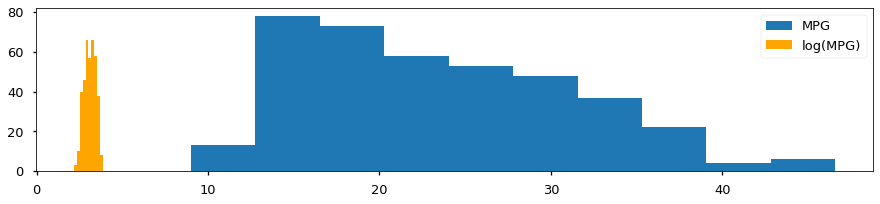

In [25]:
# Plot distributions of raw vs. transformed values

fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y_raw, label="MPG")
ax.hist(y_log, color="orange", label="log(MPG)")
ax.legend();

In [26]:
y_log_model = sm.OLS(y_log, sm.add_constant(X_raw))
y_log_results = y_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:               log(mpg)   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1310.
Date:                Thu, 19 May 2022   Prob (F-statistic):          1.59e-173
Time:                        17:46:28   Log-Likelihood:                 268.08
No. Observations:                 392   AIC:                            -530.2
Df Residuals:                     389   BIC:                            -518.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6397      0.143     11.442      0.0

## Interpreting Coefficients for a Transformed Target

This model is statistically significant overall, and explains about 87% of the variance of the log-transformed MPG. This is not directly comparable to the R-Squared values for the previous models, but at a high level it tells us that the model fits are about the same whether or not the target has been transformed.

Once again, we could interpret the coefficients in a way that is technically correct but not especially useful:

> For each increase of 1 lb in weight, we see an associated decrease of about 0.0003 in the natural log of the MPG

> For each increase of 1 year in model year, we see an associated increase of about 0.03 in the natural log of the MPG

Again, changes to the natural log of a variable are not easy to grasp. Instead, we can frame the change in the MPG in terms of a multiplier. We'll focus on the `weight` coefficient specifically here but it's the same for all predictor coefficients.

A decrease in $log(MPG)$ of 0.0003 is equivalent to multiplying MPG by $e^{0.0003}$:

In [27]:
y_log_results.params["weight"]

-0.00030860096419966

In [28]:
np.exp(y_log_results.params["weight"])

0.99969144664818

In other words, increasing `weight` by 1 causes MPG to become about 99.969% of its original value. Another way to frame this is in terms of reducing by a percentage:

In [29]:
- (1 - np.exp(y_log_results.params["weight"])) * 100

-0.030855335182000676

Notice that this is basically the same as if we had just multiplied the original coefficient by 100:

In [30]:
y_log_results.params["weight"] * 100

-0.030860096419966003

This is due to another approximation, that for small values of $\beta$,

$$ e^\beta \approx 1 + \beta $$

Thus **for small coefficients, the conventional way to interpret a log-transformed target is this:**

> For each increase of 1 unit in `<feature>`, we see an associated change of `<coefficient * 100>`% in `<target>`

For this particular model, that means:

> For each increase of 1 lb in weight, we see an associated decrease of about 0.03% in MPG

> For each increase of 1 year in model year, we see an associated increase of about 3.1% in MPG

What if we had a model with much larger coefficients? For example, if the weight were in **tons** rather than **pounds**?

We'll use the US ton, where 1 ton = 2000 lbs, and will apply a linear transformation to change the units.

In [31]:
X_weight_tons = X_raw.copy()

X_weight_tons["weight"] = X_weight_tons["weight"] / 2000
X_weight_tons

,weight,model year
0,1.7520,70
1,1.8465,70
2,1.7180,70
3,1.7165,70
4,1.7245,70
...,...,...
387,1.3950,82
388,1.0650,82
389,1.1475,82
390,1.3125,82


In [32]:
weight_tons_model = sm.OLS(y_log, sm.add_constant(X_weight_tons))
weight_tons_results = weight_tons_model.fit()

weight_tons_results.params

const         1.639728
weight       -0.617202
model year    0.031291
dtype: float64

Since this is a **larger coefficient**, there is more of a difference between actually calculating the change vs. using the approximation:

In [33]:
(np.exp(weight_tons_results.params["weight"]) - 1) * 100

-46.05482475477222

In [34]:
weight_tons_results.params["weight"] * 100

-61.72019283993188

Therefore instead of just multiplying the coefficient by 100, we'll use the value produced by the actual math:

> For each increase of 1 ton in weight, we see an associated decrease of about 46% in MPG

This approach runs into problems if you have **even larger coefficients** due to the nature of exponential growth. For example, if you had a coefficient of 1000, taking the exponent will actually exceed the amount of space allotted for a 64-bit floating point number:

In [35]:
np.exp(1000)

<ipython-input-35-47a6eab891c2>:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

(The term "overflow" means we have exceeded the limit, so the value gets represented as `inf`, i.e. infinity, even though it isn't actually infinitely large.)

Fortunately you can usually use scaling to change the units of the coefficient and avoid this challenge while still producing an interpretable result. If the coefficient is too large, you can either scale the target units to be larger (e.g. a price in thousands of dollars rather than dollars) or scale the predictor units to be smaller (e.g. a weight in pounds rather than tons).

## Model with a Log Transformed Predictor and Target

You are not limited to log-transforming just the predictor or the target. You can also transform both!

Here we'll use existing variables `y_log` (log-transformed MPG) and `X_weight_log` (log-transformed weight, raw model year).

In [36]:
log_model = sm.OLS(y_log, sm.add_constant(X_weight_log))
log_results = log_model.fit()

print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:               log(mpg)   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1436.
Date:                Thu, 19 May 2022   Prob (F-statistic):          2.38e-180
Time:                        17:46:28   Log-Likelihood:                 283.91
No. Observations:                 392   AIC:                            -561.8
Df Residuals:                     389   BIC:                            -549.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0395      0.246     32.720      

We'll focus on interpreting the coefficient for `weight` here, since the coefficient for `model year` has the same interpretation as in the model where just MPG was log-transformed.

In [37]:
log_results.params["log(weight)"]

-0.9340850470520536

One last time, we could interpret the coefficient like this and would be technically correct:

> For each increase of 1 in the natural log of weight, there is a decrease of about 0.9 ($\beta$) in the natural log of MPG

Which also means:

> For each time we multiply the weight by about 2.72 ($e$), we multiply MPG by about 0.4 ($e^{\beta}$)

But those numbers are still hard to grasp. So let's go back to setting the increase of the predictor to 1% rather than 1 unit.

If `weight` increases by 1%, MPG is multiplied by $e^{log(1.01)\beta}$, where $\beta$ is the coefficient for weight.

In [38]:
np.exp(np.log(1.01) * log_results.params["log(weight)"])

0.9907486046766623

We can subtract 1 and multiply by 100 to interpret as a percentage change:

In [39]:
(np.exp(np.log(1.01) * log_results.params["log(weight)"]) - 1) * 100

-0.9251395323337741

Again because of the approximations discussed earlier, this is essentially the same as the original coefficient:

In [40]:
log_results.params["log(weight)"]

-0.9340850470520536

In other words, regardless of which formula we use, we can conclude:

> For each increase of 1% in weight, we see an associated decrease of about 0.9% in MPG

Keep in mind that the approximation only works here because both the percentage and the coefficient are small enough. For larger values you would want to be sure to use the full formula.

## Takeaway "Cheat Sheet"

For faster reference, we've summarized all of the different coefficient interpretations below. We'll define $y$ as the dependent variable, $x$ as (one of) the independent variable(s), and $\beta$ as the coefficient for $x$ found in a linear regression.

### Raw Predictor vs. Raw Target

This is just our regular linear regression. We are modeling the relationship as:

$$ \large{ y = \beta x \ldots } $$

(The "$\ldots$" is to indicate additional predictors, intercept, error, etc. that are not represented in this version of the formula.)

To interpret $\beta$ we would say:

> For each increase of $\large{1}$ unit in $\large{x}$, we see an associated change of $\large{\beta}$ in $\large{y}$

### Log Transformed Predictor vs. Raw Target

We are modeling the relationship as:

$$ \large{ y = \beta* log(x) \ldots } $$

(Note that this $\beta$ will be a different value than the $\beta$ in the previous equation, since it is modeling a different relationship.)

To interpret $\beta$ we would say:

> For each increase of $\large{1\%}$ in $\large{x}$, we see an associated change of $\large{\beta / 100}$ in $\large{y}$

That interpretation relies on the approximation $log(1.01) \approx 0.01$. For a percentage larger than 1%, we can also use this formula:

> For each increase of $\large{p\%}$ in $\large{x}$, we see an associated change of $\large{\beta * log((100 + p)/100)}$ in $\large{y}$

### Raw Predictor vs. Log Transformed Target

We are modeling the relationship as:

$$ \large{ log(y) = \beta x \ldots } $$

For **small** values of $\beta$, we can interpret $\beta$ as:

> For each increase of $\large{1}$ unit in $\large{x}$, we see an associated change of $\large{(\beta * 100)}\%$ in $\large{y}$

That interpretation relies on the approximation $e^\beta \approx 1 + \beta$ for small values of $\beta$. For an interpretation that will work for **larger** values of $\beta$, we can use this formula:

> For each increase of $\large{1}$ unit in $\large{x}$, we see an associated change of $\large{((e^\beta - 1) * 100)}\%$ in $\large{y}$

For **very large** values of $\beta$ you likely need to scale the predictor and/or target to create a smaller coefficient and avoid issues with exponential growth.

### Log Transformed Predictor vs. Log Transformed Target

We are modeling the relationship as:

$$ \large{ log(y) = \beta * log(x) \ldots } $$

For **small** values of $\beta$ and a 1% increase, we can interpret $\beta$ as:

> For each increase of $\large{1\%}$ in $\large{x}$, we see an associated change of $\large{\beta\%}$ in $\large{y}$

For **larger** values of $\beta$ and/or percentages larger than 1%, we can also use this formula:

> For each increase of $\large{p\%}$ in $\large{x}$, we see an associated change of $\large{((e^{\beta * log((100 + p)/100)} - 1) * 100)\%}$ in $\large{y}$

## Summary

In this lesson, you got a quick review of the math background for logarithmic functions, and saw how they can be used to transform both predictors and targets in linear regression models. Interpreting the resulting coefficients can be much more complicated than interpreting basic linear regression coefficients, so we walked through all of formulas you can use. Remember that log transformations are non-linear transformations, so they should only be used if you have a reason to believe that the underlying relationship is not linear.